In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('/Users/eciel/Desktop/y3s2/math4570/project/CNN_sub/dataset_2000.csv', index_col=0)
print(dataset.shape)

(2000, 22501)


In [3]:
dir = '/Users/eciel/Desktop/y3s2/math4570/project/CNN_sub'

In [4]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,22491,22492,22493,22494,22495,22496,22497,22498,22499,Target
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.141643,0.170945,0.144681,0.120416,0.134589,0.135334,0.146643,0.145720,0.136861,0.158913,...,0.225402,0.211255,0.197990,0.192564,0.194994,0.206209,0.214901,0.207494,0.201035,0.0
4,0.026669,0.019881,0.027184,0.017099,0.018000,0.014370,0.015096,0.014257,0.009509,0.012638,...,0.590608,0.583297,0.576501,0.564819,0.560007,0.541477,0.523699,0.520758,0.516949,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.116076,0.114485,0.107206,0.105213,0.112215,0.127081,0.114783,0.103974,0.108155,0.109855,...,0.076478,0.070314,0.082774,0.084133,0.081973,0.082092,0.087135,0.097989,0.090095,0.0
1996,0.043083,0.041415,0.048605,0.043458,0.049944,0.045463,0.041208,0.044168,0.046213,0.044864,...,0.349155,0.359752,0.358579,0.362923,0.360237,0.355084,0.360335,0.376276,0.399653,0.0
1997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1998,0.266252,0.251158,0.279192,0.247119,0.238657,0.238110,0.241987,0.271989,0.237062,0.217697,...,0.283047,0.270483,0.280916,0.316436,0.318623,0.313937,0.326394,0.315152,0.299201,0.0


In [5]:
y0 = dataset["Target"]
y0.shape[0]

2000

In [6]:
# Replace label -10 by 6 for catacorial loss
classes = 7

for i in range(y0.shape[0]):
    if y0[i] == -10.0:
        #print(y0[i])
        y0[i] = 6.0
    elif y0[i] == 10.0:
        y0[i] = 7.0

In [7]:
X = dataset.drop('Target', inplace=False, axis=1)
#X = X.drop('Unnamed: 0', inplace=False, axis=1)
print(X.columns)
#X = dataset.drop('Unnamed: 0', inplace=False, axis=1)
X_train = X.to_numpy()
y0 = y0.to_numpy()
y0 = y0.astype(int)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '22490', '22491', '22492', '22493', '22494', '22495', '22496', '22497',
       '22498', '22499'],
      dtype='object', length=22500)


In [8]:
X_train.shape

(2000, 22500)

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, 150, 150))
X_train.shape

(2000, 1, 150, 150)

In [12]:
tensor_x = torch.Tensor(X_train) # transform to torch tensor
tensor_y = torch.Tensor(y0)
tensor_y = tensor_y.type(torch.LongTensor)

In [13]:
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

# split to training set and validation set

In [43]:
from torchvision.datasets import ImageFolder
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split
from torchvision.transforms import Compose, ToTensor, Resize
from torch.utils.data import DataLoader

batch_size = 16
num_workers = 1
epoch = 10
num_epochs = 25

dataset_tensor = TensorDataset(tensor_x,tensor_y) # create your datset

def train_val_dataset(dataset, val_split=0.25):
    train_idx, val_idx = train_test_split(list(range(len(dataset))), test_size=val_split)
    datasets = {}
    datasets['train'] = Subset(dataset, train_idx)
    datasets['val'] = Subset(dataset, val_idx)
    return datasets

print(len(dataset))
datasets = train_val_dataset(dataset_tensor)
print(len(datasets['train']))
print(len(datasets['val']))
# The original dataset is available in the Subset class
print(datasets['train'].dataset)

dataloaders = {x:DataLoader(datasets[x], shuffle=True, num_workers=4, batch_size=batch_size,) for x in ['train','val']}
x,y = next(iter(dataloaders['train']))

dataset_sizes = {x: len(datasets[x]) for x in ['train', 'val']}

print(x.shape, y.shape)

2000
1500
500
torch.Size([16, 1, 150, 150]) torch.Size([16])


In [15]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [16]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True

# Train the model

In [17]:
loss_train = []
acc_train = []
loss_val = []
acc_val = []
def train_model(model, criterion, optimizer, scheduler, num_epochs):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)
        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
            
            if phase == 'train':
                loss_train.append(epoch_loss)
                acc_train.append(epoch_acc)
            else:
                loss_val.append(epoch_loss)
                acc_val.append(epoch_acc)

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    PATH = dir +'cnn.pth'
    torch.save(model.state_dict(), PATH)
    model.load_state_dict(best_model_wts)
    return model

# Model

In [18]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l


class Inception(nn.Module):
    # `c1`--`c4` are the number of output channels for each path
    def __init__(self, in_channels, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # Path 1 is a single 1 x 1 convolutional layer
        self.p1_1 = nn.Conv2d(in_channels, c1, kernel_size=1)
        # Path 2 is a 1 x 1 convolutional layer followed by a 3 x 3
        # convolutional layer
        self.p2_1 = nn.Conv2d(in_channels, c2[0], kernel_size=1)
        self.p2_2 = nn.Conv2d(c2[0], c2[1], kernel_size=3, padding=1)
        # Path 3 is a 1 x 1 convolutional layer followed by a 5 x 5
        # convolutional layer
        self.p3_1 = nn.Conv2d(in_channels, c3[0], kernel_size=1)
        self.p3_2 = nn.Conv2d(c3[0], c3[1], kernel_size=5, padding=2)
        # Path 4 is a 3 x 3 maximum pooling layer followed by a 1 x 1
        # convolutional layer
        self.p4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.p4_2 = nn.Conv2d(in_channels, c4, kernel_size=1)

    def forward(self, x):
        p1 = F.relu(self.p1_1(x))
        p2 = F.relu(self.p2_2(F.relu(self.p2_1(x))))
        p3 = F.relu(self.p3_2(F.relu(self.p3_1(x))))
        p4 = F.relu(self.p4_2(self.p4_1(x)))
        # Concatenate the outputs on the channel dimension
        return torch.cat((p1, p2, p3, p4), dim=1)

In [19]:
b1 = nn.Sequential(nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [20]:
b2 = nn.Sequential(nn.Conv2d(64, 64, kernel_size=1),
                   nn.ReLU(),
                   nn.Conv2d(64, 192, kernel_size=3, padding=1),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [21]:
b3 = nn.Sequential(Inception(192, 64, (96, 128), (16, 32), 32),
                   Inception(256, 128, (128, 192), (32, 96), 64),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [22]:
b4 = nn.Sequential(Inception(480, 192, (96, 208), (16, 48), 64),
                   Inception(512, 160, (112, 224), (24, 64), 64),
                   Inception(512, 128, (128, 256), (24, 64), 64),
                   Inception(512, 112, (144, 288), (32, 64), 64),
                   Inception(528, 256, (160, 320), (32, 128), 128),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [23]:
b5 = nn.Sequential(Inception(832, 256, (160, 320), (32, 128), 128),
                   Inception(832, 384, (192, 384), (48, 128), 128),
                   nn.AdaptiveAvgPool2d((1,1)),
                   nn.Flatten())

model_conv = nn.Sequential(b1, b2, b3, b4, b5, nn.Linear(1024, classes+1))

In [24]:
model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [ ]:
for fold, (train_idx,val_idx) in enumerate(splits.split(np.arange(len(dataset)))):

    print('Fold {}'.format(fold + 1))

    train_sampler = SubsetRandomSampler(train_idx)
    test_sampler = SubsetRandomSampler(val_idx)
    train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)
    test_loader = DataLoader(dataset, batch_size=batch_size, sampler=test_sampler)

    model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=epoch)
      

Fold 1
Epoch 0/9
----------


# Plot loss

In [83]:
from matplotlib import pyplot as plt

In [84]:
epochs = list(range(0, epoch))

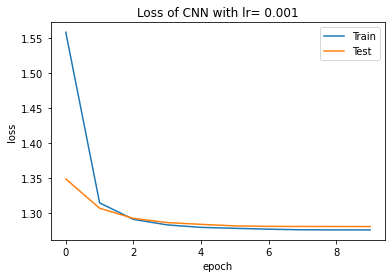

In [85]:
plt.plot(epochs, loss_train, label = "Train")
plt.plot(epochs, loss_val, label = "Test")

plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss of CNN with lr= 0.001")

plt.savefig('0.001_10000loss.jpg')
plt.show()

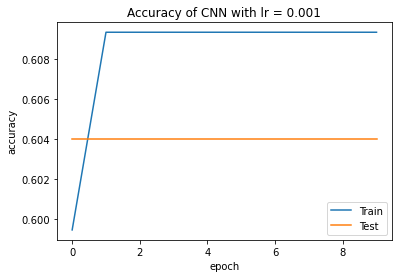

In [86]:
plt.plot(epochs, acc_train, label = "Train")
plt.plot(epochs, acc_val, label = "Test")

plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Accuracy of CNN with lr = 0.001")

plt.savefig('0.001_10000acc.jpg')
plt.show()